In [1]:
from distance import *
import os
import pickle

path_features = f"../ShapeDatabase_INFOMR_norm1_features"
class_types = os.listdir(path_features)
class_types = [class_type for class_type in class_types if os.path.isdir(path_features + "/" + class_type) and class_type != ".git"]

feature_vectors = {
    "obj_name": [],
    "class_type": [],
    "feature_vector": []
}
for class_type in class_types:
    path_class_features = os.path.join(path_features, class_type)
    for obj_feature in os.listdir(path_class_features):
        path = os.path.join(path_class_features, obj_feature)
        feature_vector = pickle.load(open(path, "rb"))

        feature_vectors["obj_name"] += [obj_feature.removesuffix(".pickle")]
        feature_vectors["class_type"] += [class_type]
        feature_vectors["feature_vector"] += [feature_vector["feature_vector"]]


In [2]:
import pandas as pd

num_bins = 150
fv_df = pd.DataFrame(feature_vectors)
fv_orig = np.asarray(pd.DataFrame(feature_vectors)["feature_vector"].tolist())
fv = feature_normalization(fv_orig, num_bins=num_bins)

In [3]:
fv

array([[ 3.87738219e+00, -2.20348791e-02,  1.99427120e+00, ...,
         0.00000000e+00,  1.61095449e-07,  4.02738623e-08],
       [-3.35107462e-01, -2.20353596e-02, -4.84182928e-03, ...,
         1.20821587e-07,  0.00000000e+00,  1.20821587e-07],
       [ 1.96897986e+00, -2.20353000e-02,  2.68568873e+00, ...,
         3.22190898e-07,  2.01369311e-07,  1.61095449e-07],
       ...,
       [-7.78376881e-01, -2.20352865e-02, -2.60178561e-01, ...,
         5.63834072e-07,  4.02738623e-07,  2.41643174e-07],
       [-7.29336283e-01, -2.20348897e-02, -3.71851340e-02, ...,
         9.26298832e-07,  4.02738623e-07,  3.22190898e-07],
       [-6.69231433e-01, -2.20325396e-02, -4.76767767e-01, ...,
         1.40958518e-06,  7.65203383e-07,  4.43012485e-07]])

In [4]:
# area, compactness, rectangularity, diameter, convexity, eccentricity, d1, d2, d3, d4, a3

def class_features(df):
    feature_class_dict = {}
    for class_type in df["class_type"].unique():
        aux = df[df["class_type"] == class_type]
        fv_orig = np.asarray(pd.DataFrame(aux)["feature_vector"].tolist())

        area = fv_orig[:,0]
        compactness= fv_orig[:,1]
        rectangularity= fv_orig[:,2]
        diameter= fv_orig[:,3]
        convexity= fv_orig[:,4]
        eccentricity= fv_orig[:,5]
        d1= fv_orig[:,6:num_bins+6]
        d2= fv_orig[:,num_bins+6:num_bins*2+6]
        d3= fv_orig[:,num_bins*2+6:num_bins*3+6]
        d4= fv_orig[:,num_bins*3+6:num_bins*4+6]
        a3= fv_orig[:,num_bins*4+6:num_bins*5+6]

        feature_class_dict[class_type] = {
            "area": area,
            "compactness": compactness,
            "rectangularity": rectangularity,
            "diameter": diameter,
            "convexity": convexity,
            "eccentricity": eccentricity,
            "d1": d1,
            "d2": d2,
            "d3": d3,
            "d4": d4,
            "a3": a3
        }

    return feature_class_dict
feature_class_dict = class_features(fv_df)

In [5]:
fv_df.class_type.unique()

array(['House', 'Car', 'ClassicPiano', 'Apartment', 'MultiSeat',
       'Humanoid', 'Spoon', 'Helicopter', 'DeskPhone', 'Quadruped',
       'Rocket', 'RoundTable', 'Guitar', 'Vase', 'Jet', 'Door',
       'NonWheelChair', 'Mug', 'Drum', 'AircraftBuoyant', 'FloorLamp',
       'Hand', 'Train', 'RectangleTable', 'Monitor', 'Sign', 'Starship',
       'Violin', 'Cellphone', 'Bird', 'TruckNonContainer', 'Knife',
       'ComputerKeyboard', 'WheelChair', 'Bottle', 'PlantIndoors',
       'Bicycle', 'Cup', 'Shelf', 'Ship', 'Fish', 'PianoBoard',
       'Skyscraper', 'Sword', 'HumanHead', 'Wheel',
       'BuildingNonResidential', 'MilitaryVehicle', 'Insect', 'Hat',
       'City', 'PlantWildNonTree', 'Biplane', 'Computer', 'SubmachineGun',
       'Bookset', 'DeskLamp', 'Chess', 'Bed', 'Tree', 'Truck',
       'AquaticAnimal', 'Musical_Instrument', 'Glasses', 'Tool', 'Bus',
       'Monoplane', 'Motorcycle', 'Gun'], dtype=object)

In [6]:
fv_df["feature_vector"] = fv.tolist()
fv_df["feature_vector"] = fv_df["feature_vector"].apply(np.asarray)
fv_df.to_pickle("../ShapeDatabase_INFOMR_norm1_features/feature_vector_df_normalized.pickle")
fv_df

,obj_name,class_type,feature_vector
0,D00415,House,"[3.877382189485117, -0.0220348791458594, 1.994..."
1,m456,House,"[-0.3351074619421997, -0.022035359565244616, -..."
2,D00091,House,"[1.9689798607684919, -0.022035300049956096, 2...."
3,m449,House,"[0.7549812239638534, -0.022035337964609544, 1...."
4,m434,House,"[1.9300909365164207, -0.022035359071035605, 3...."
...,...,...,...
2478,D00153,Gun,"[-0.6926187361180249, -0.022035334006051517, 0..."
2479,m672,Gun,"[-0.8208738626592363, -0.022035284302948523, 0..."
2480,m659,Gun,"[-0.7783768807449055, -0.0220352864577264, -0...."
2481,m682,Gun,"[-0.7293362834917378, -0.022034889697311037, -..."


In [7]:
fv_df[fv_df["class_type"] == "Car"]

,obj_name,class_type,feature_vector
46,D00670,Car,"[-0.0923389402946444, -0.02203526054683541, 1...."
47,m1518,Car,"[-0.2122955004417693, -0.022035344025368584, 1..."
48,m1539,Car,"[0.1437565301433784, -0.022035223767318163, 1...."
49,m1547,Car,"[-0.33450813985024863, -0.02203534829548575, 0..."
50,m1538,Car,"[-0.24301507223211233, -0.022035341284234674, ..."
...,...,...,...
130,D00767,Car,"[-0.09366477766538836, -0.022035345392472715, ..."
131,m1563,Car,"[1.050816648158943, -0.022035235552397354, 1.0..."
132,m1492,Car,"[0.8471971971538661, -0.02203237277360561, -0...."
133,m1516,Car,"[0.16766033670558153, -0.022035049969717183, 0..."


In [8]:
dists = []

# "area": area,
# "compactness": compactness,
# "rectangularity": rectangularity,
# "diameter": diameter,
# "convexity": convexity,
# "eccentricity": eccentricity,
# "d1": d1,
# "d2": d2,
# "d3": d3,
# "d4": d4,
# "a3": a3
query_idx = 2
fv_df.iloc[query_idx]
w = np.ones(11)
# w = np.asarray([0.2, 0.3, 0.1, 0.7, 0.7, 1, 0.1, 0.3, 0.8, 0.4, 0.5])
# w = np.asarray([0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1])
# w = np.asarray([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0, 0, 0, 0, 0])
for v in fv[:]:
    dists += [distance(fv[query_idx], v, 50, w)]
    # dists += [np.linalg.norm(fv[query_idx] - v)]

print(len(dists))
print(np.sort(dists)[:6])
dists_idx = np.argsort(dists)[:6]
dists_idx

2483
[0.         0.0981308  0.14667976 0.16963015 0.17695901 0.17716969]


array([   2,  889, 1090, 1095, 2012, 2000])

In [9]:
fv_df.loc[dists_idx]

,obj_name,class_type,feature_vector
2,D00091,House,"[1.9689798607684919, -0.022035300049956096, 2...."
889,D00063,Drum,"[2.0565910128711744, -0.02203534704061537, 2.5..."
1090,D00852,Monitor,"[2.564641754054736, -0.02203528657622268, 2.47..."
1095,D00919,Monitor,"[1.2224591663067665, -0.022035309620510268, 2...."
2012,D01085,Computer,"[1.322079192704572, -0.022035339268697406, 2.3..."
2000,m1769,Computer,"[1.299457195462434, -0.02203533926870327, 2.27..."


In [10]:
from vedo import * 
from MeshObject import * 
path_shapes = f"../ShapeDatabase_INFOMR_norm"

plt = Plotter(shape=[1,6], sharecam=False)
for idx_plot, idx_dist in zip(range(6), dists_idx):
    plt.at(idx_plot)
    path = os.path.join(path_shapes, fv_df.iloc[idx_dist]["class_type"], fv_df.iloc[idx_dist]["obj_name"].removesuffix(".pickle") + ".obj")
    text = Text2D(f"class={fv_df.loc[idx_dist]['class_type']}; dist={dists[idx_dist]}")
    mesh = MeshObject(path, visualize=True)
    plt += [mesh, text]
plt.show().interactive()

In [11]:
# be detailed during the presentation wrt tsne - explain why shapes might be in a cluster
from sklearn.manifold import TSNE
from functools import partial

# x = TSNE(n_components=2, metric=partial(distance, num_bins=num_bins, feature_weights=w)).fit_transform(fv)
# pickle.dump(x, open("../ShapeDatabase_INFOMR_norm1_features/tsne_2d_components.pickle", "wb"))
x = pickle.load(open("../ShapeDatabase_INFOMR_norm1_features/tsne_2d_components.pickle", "rb"))

In [12]:
# class_subset_1 = ["Ship", "House", "Tool", "Sign", "Door", "Car", "Monoplane", "Cellphone", "Knife", "Bus", "Humanoid", "Mug"]
class_subset_1 = ['Apartment', 'AircraftBuoyant', 'Bird', 'Bottle', 'Bicycle',
       'BuildingNonResidential', 'Biplane', 'Monoplane', 'Bed',
       'AquaticAnimal', 'Humanoid', 'Ship']
fv_df_aux = fv_df[fv_df["class_type"].isin(class_subset_1)]
# fv_df_aux = fv_df
idx_aux = fv_df_aux.index.to_numpy()
# idx_aux = fv_df.index.to_numpy()

In [13]:
plot_labels = [f"{class_type}\n{obj_name}" for class_type, obj_name in zip(fv_df_aux.class_type.tolist(), fv_df_aux.obj_name.tolist())]
class_labels = fv_df_aux.class_type.tolist()

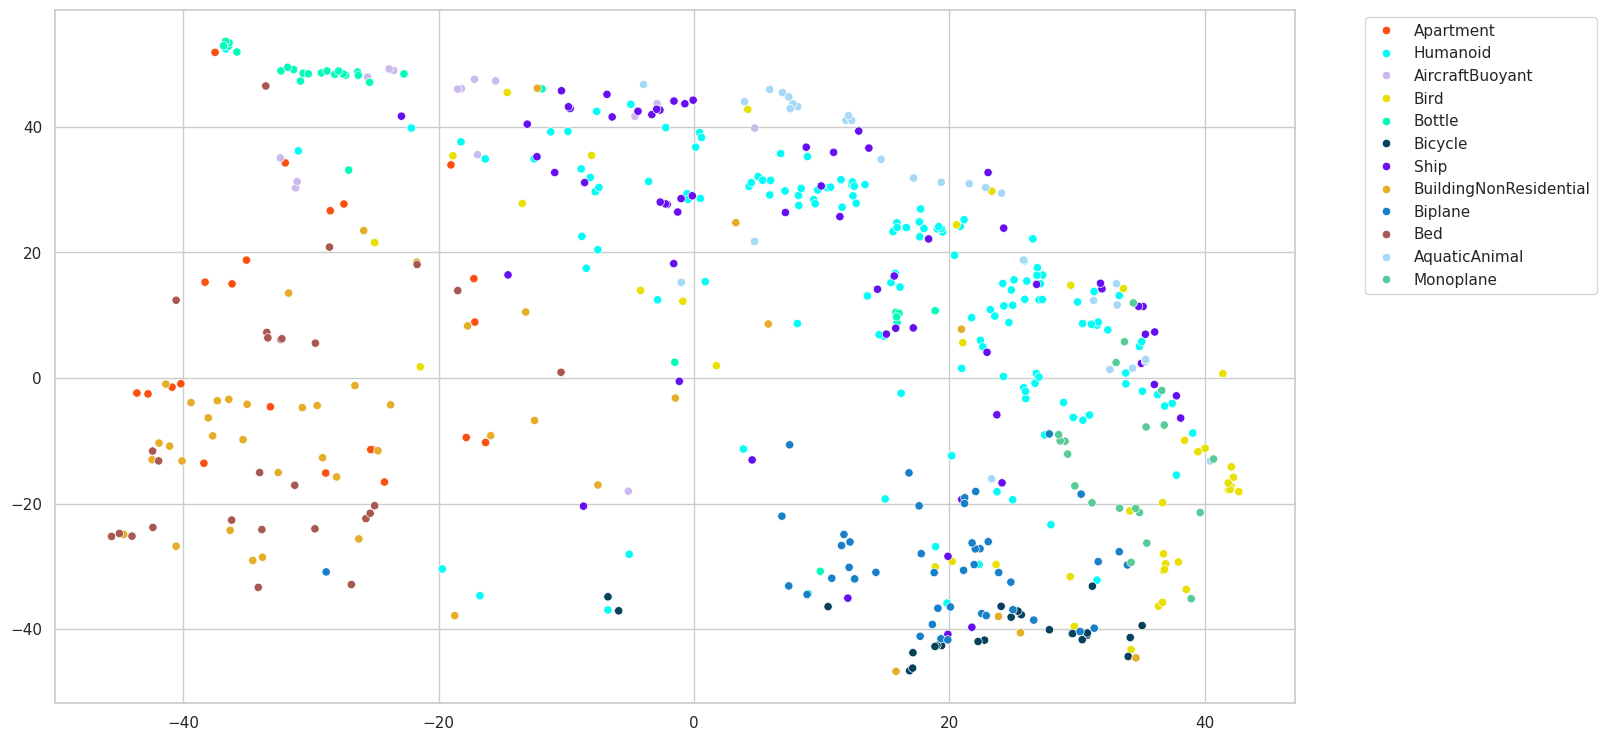

In [14]:
import matplotlib
# %matplotlib qt
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

sns.set_theme(style="whitegrid")

sns_colors = [
    "#FB5012", "#01FDF6", "#CBBAED", "#E9DF00", "#03FCBA", "#08415C",
    "#6610F2", "#E6AD29", "#187FC9", "#A85751", "#A6D9F7", "#57CC99"
]

plt.figure(figsize=(16,9))
ax = sns.scatterplot(x=x[:,0][idx_aux], y=x[:,1][idx_aux], hue=class_labels, legend=True, palette=sns_colors)
# ax = sns.scatterplot(x=x[:,0][idx_aux], y=x[:,1][idx_aux], hue=class_labels, legend=True)
plt.legend(loc="upper left", bbox_to_anchor = (1.05, 1))

highlight_kwargs = dict(
    # color="red",
    markeredgecolor="black",
    linewidth=1,
    markeredgewidth=3,
    # PathCollection.
    # facecolor="black",
    edgecolor="black",
)

annotation_kwargs = dict(
    bbox=dict(
        boxstyle="round,pad=.5",
        fc="orange",
        alpha=.7,
        ec="k",
    ),
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3",
        shrinkB=0,
        ec="k",
    ),
    ma="center"
)

# print(ylim_min, ylim_max, plt.ylim())
# print(xlim_min, xlim_max, plt.xlim())

# plt.xlim(xlim_min, xlim_max)
# plt.ylim(ylim_min, ylim_max)

cursor = mplcursors.cursor(ax, hover=True, highlight=True, highlight_kwargs=highlight_kwargs, annotation_kwargs=annotation_kwargs)
cursor.connect(
    "add", lambda x: x.annotation.set(text=plot_labels[x.index])
)


plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

label_to_int = {label: id for id, label in enumerate(fv_df.class_type.tolist())}
int_to_label = {id: label for label, id in label_to_int.items()}

int_labels = [label_to_int[label] for label in fv_df.class_type.tolist()]

# "area": area,
# "compactness": compactness,
# "rectangularity": rectangularity,
# "diameter": diameter,
# "convexity": convexity,
# "eccentricity": eccentricity,
# "d1": d1,
# "d2": d2,
# "d3": d3,
# "d4": d4,
# "a3": a3

w = [0.5, 0.5, 0.2, 0.7, 0.4, 0.7, 0.2, 0.9, 0.9, 0.5, 0.7]
knn = KNeighborsClassifier(metric=partial(distance, num_bins=num_bins, feature_weights=w), algorithm="auto")
knn.fit(fv, int_labels)

KNeighborsClassifier(metric=functools.partial(<function distance at 0x701d3ad6c0e0>, num_bins=150, feature_weights=[0.5, 0.5, 0.2, 0.7, 0.4, 0.7, 0.2, 0.9, 0.9, 0.5, 0.7]))

In [25]:
query_idx = 312

knn.kneighbors([fv[query_idx]])

(array([[0.        , 0.00273918, 0.00459271, 0.00614171, 0.00758494]]),
 array([[ 312, 1520,  487,  462,  345]]))

In [18]:
from pynndescent import NNDescent

# fv = fv.astype(np.float32)
numbda_dist = distance_numba(num_bins=num_bins, feature_weights=w)
index = NNDescent(data=fv, metric=numbda_dist)
index.prepare()

/home/keddie/anaconda3/envs/mr_project/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


array([ 312,  333,  334, 1139,   82,  660, 2385,  320, 1962,  482,  480,
        266, 2327, 2380,  745, 1003, 2084, 2387,  457,  468,  302,  268,
        735,  706,  738,  365, 1615, 1627, 1405,  642], dtype=int32)

In [51]:
# import _pickle as pickle
import pickle
# index.compress_index()
pickle.dump(index, open("idx.pickle", "wb"), protocol=4)
index = pickle.load(open("idx.pickle", "rb"))

In [34]:
PATH_FEATURES = "../ShapeDatabase_INFOMR_norm_features"
for class_type in class_types:
    path_class_features = os.path.join(PATH_FEATURES, class_type)
    for obj_feature in os.listdir(path_class_features):
        if "_normalized_normalized" in obj_feature:
            path = os.path.join(path_class_features, obj_feature)
            os.remove(path)
        

In [33]:
n_idx, n_dist = index.query([fv[query_idx]], k=5)
n_idx, n_dist = n_idx[0], n_dist[0]
n_idx, n_dist

(array([ 312, 1520, 2453,  462,  294], dtype=int32),
 array([0.        , 0.00620584, 0.01633154, 0.0164807 , 0.01737398],
       dtype=float32))

/tmp/ipykernel_219584/720655843.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=x[:,0][n_idx], y=x[:,1][n_idx], legend=True, palette=["red", "yellow", "blue", "orange", "green"], hue=fv_df.iloc[n_idx]["class_type"], edgecolor="black", linewidth=1.5)


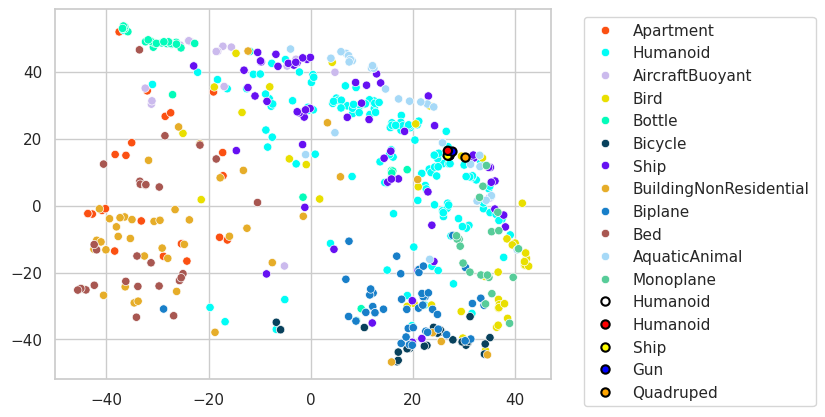

In [20]:
sns.scatterplot(x=x[:,0][idx_aux], y=x[:,1][idx_aux], hue=class_labels, legend=True, palette=sns_colors)
sns.scatterplot(x=[x[:,0][query_idx]], y=[x[:,1][query_idx]], legend=True, palette=["white"], hue=[fv_df.iloc[query_idx]["class_type"]], edgecolor="black", linewidth=1.5)
sns.scatterplot(x=x[:,0][n_idx], y=x[:,1][n_idx], legend=True, palette=["red", "yellow", "blue", "orange", "green"], hue=fv_df.iloc[n_idx]["class_type"], edgecolor="black", linewidth=1.5)
plt.legend(loc="upper left", bbox_to_anchor = (1.05, 1))


plt.show()

In [21]:
import numpy as np
import scipy.stats as scy
import numba

# using l1 distance
# implemented based on scypy and the book chapter
@numba.jit(fastmath=True)
def own_emd(x:np.ndarray,y:np.ndarray):
    # sort vals by position - ch on EMD, section 4.3.2
    ##### If x and y are equal weight, then the minimum work to 
    # transform one distribution into the other is the area 
    # b etween the graphs of the CDFs of x and y . 
    x_idx_sort = np.argsort(x)
    y_idx_sort = np.argsort(y)

    all = np.concatenate((x,y))
    all.sort()

    # diff between adjancent bins (combined and sorted x and y)
    all_dist = np.diff(all) # change between bins
    # searchsorted - indices in "x" where to insert values from "all" 
    # s.t. order is preserved
    # right side comparison a[i-1] <= v < a[i]
    # index is first position where insertion could be done; done for all elements of "all"
    x_cdf_indices = np.searchsorted(x[x_idx_sort], all[:-1], 'right')
    x_cdf = x_cdf_indices / x.size # convert idx to cumulative "probs"

    y_cdf_indices = np.searchsorted(y[y_idx_sort], all[:-1], 'right')
    y_cdf = y_cdf_indices / y.size
    
    # Math: \sum_{i=0}^{B}|x_{cdf_i}-y_{cdf_i}|\cdot d_i(a_i,a_{i+1}) 
    return np.sum(np.multiply(np.abs(x_cdf - y_cdf), all_dist))

a = np.random.randint(0, 100, size=(100))
b = np.random.randint(0, 100, size=(100))

own_emd(a,b), scy.wasserstein_distance(a,b)

(3.45, np.float64(3.45))

In [3]:
import pickle

x = pickle.load(open("../ShapeDatabase_INFOMR_norm_features/tsne_2d_components.pickle", "rb"))

<Axes: >

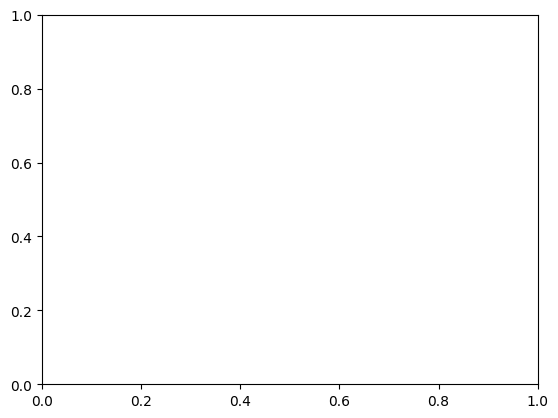

In [25]:
sns.scatterplot()

In [ ]:
sns